# Audi Car Price Prediction

# Importing all necessary Libraries

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression,Ridge,Lasso,RidgeCV, LassoCV
from sklearn.metrics import  mean_squared_error

In [3]:
audi=pd.read_csv("audi.csv")
audi.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4
1,A6,2016,16500,Automatic,36203,Diesel,20,64.2,2.0
2,A1,2016,11000,Manual,29946,Petrol,30,55.4,1.4
3,A4,2017,16800,Automatic,25952,Diesel,145,67.3,2.0
4,A3,2019,17300,Manual,1998,Petrol,145,49.6,1.0


In [4]:
audi.dtypes

model            object
year              int64
price             int64
transmission     object
mileage           int64
fuelType         object
tax               int64
mpg             float64
engineSize      float64
dtype: object

# Exploratory Data Analysis

In [5]:
audi.shape

(10668, 9)

In [6]:
# There no null values and missing values in the data
audi.isna().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

## 1. Price

In [7]:
print(audi['price'].describe())

count     10668.000000
mean      22896.685039
std       11714.841888
min        1490.000000
25%       15130.750000
50%       20200.000000
75%       27990.000000
max      145000.000000
Name: price, dtype: float64


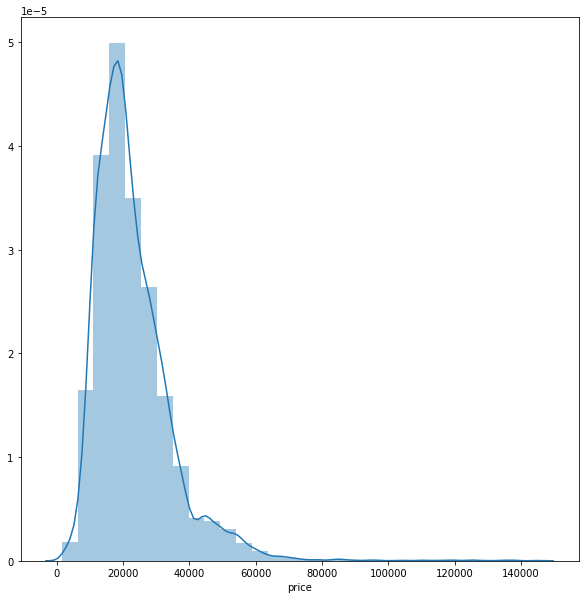

In [8]:
plt.figure(figsize = (10,10))
sns.distplot(audi['price'],bins=30)
plt.show()

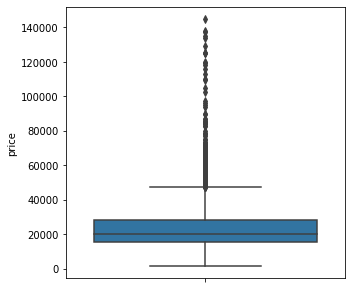

In [9]:
plt.figure(figsize = (5,5))
sns.boxplot(y = 'price', data = audi)
plt.show()

In [10]:
print('Number of outliers in the data:', len(audi[audi['price']>50000]))

Number of outliers in the data: 319


In [11]:
audi = audi[audi['price']< 50000] # Removing the outliers from the data
print('Number of data points after removing outliers :', audi.shape[0])

Number of data points after removing outliers : 10342


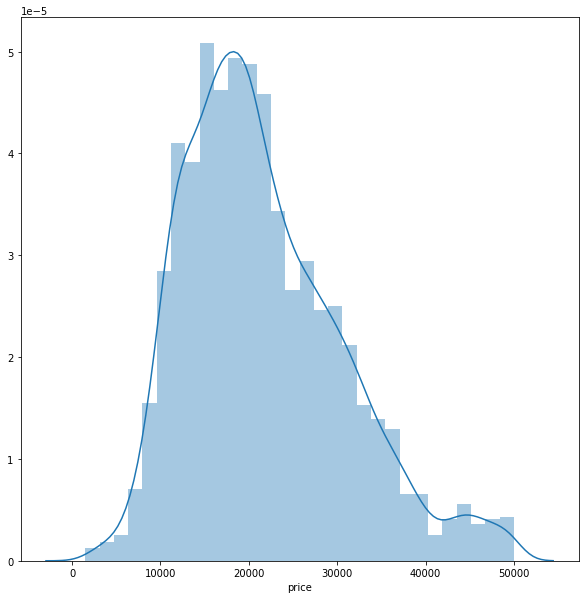

In [12]:
plt.figure(figsize = (10,10))
sns.distplot(audi['price'],bins=30)
plt.show()

## 2. Model

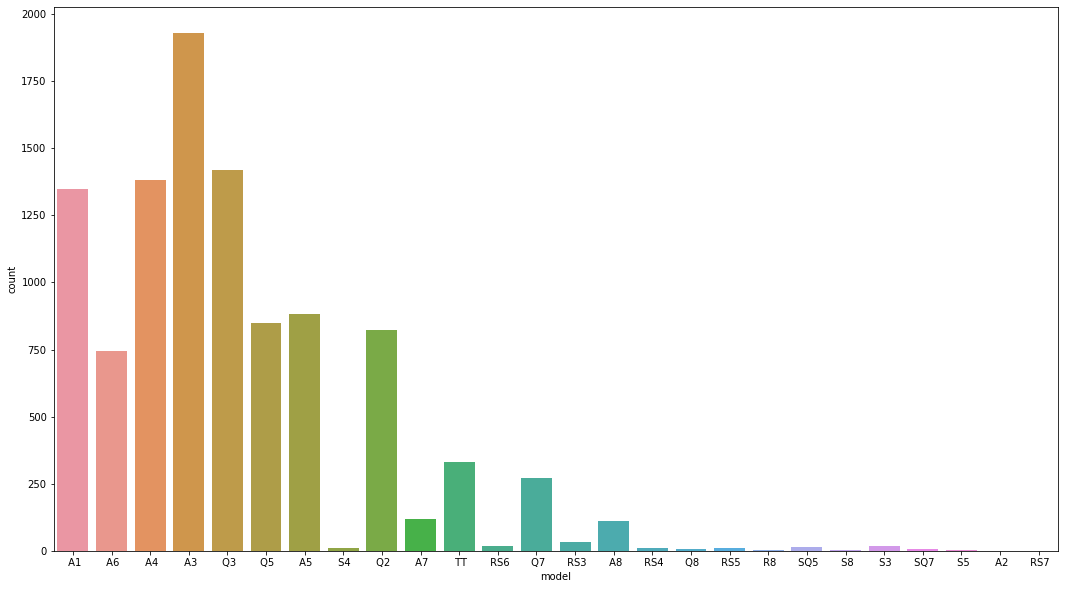

In [13]:
# Count plot on model
plt.subplots(figsize=(18,10))
ax = sns.countplot(audi.model, label = "Count")

In [14]:
model_count = audi['model'].value_counts()
print('Number of Unique models in the data are:', model_count.shape[0])

Number of Unique models in the data are: 26


In [15]:
print('Top ten models in the data: \n', audi.model.value_counts()[:10])

Top ten models in the data: 
  A3    1929
 Q3    1417
 A4    1380
 A1    1347
 A5     881
 Q5     849
 Q2     822
 A6     743
 TT     330
 Q7     271
Name: model, dtype: int64


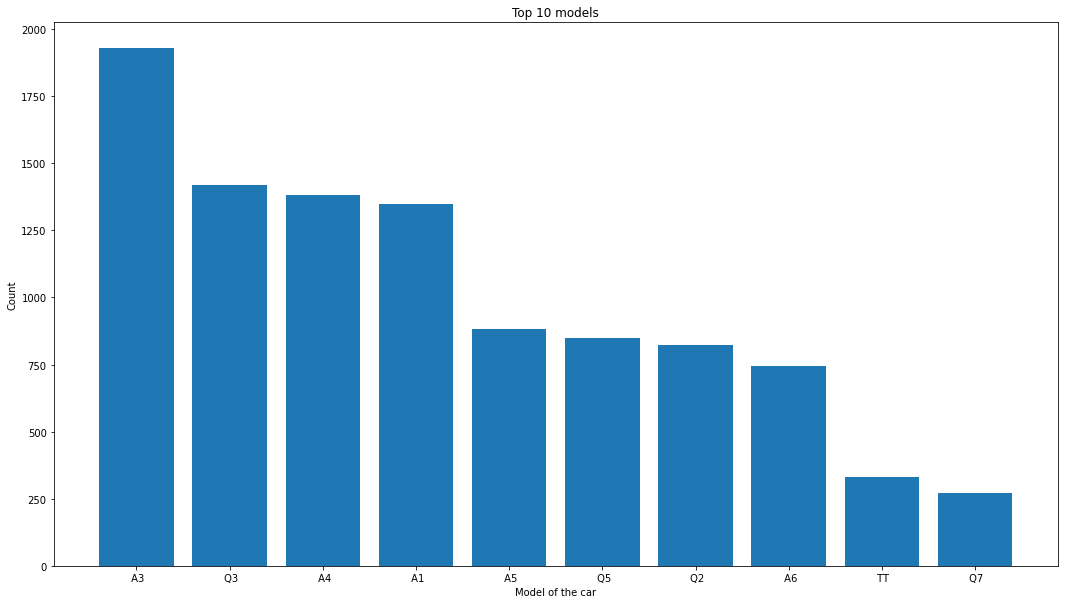

In [16]:
x = audi.model.value_counts().index.values.astype('str')[:10]
y = audi.model.value_counts().values[:10]


objects = set(audi['model'])

plt.figure(figsize=(18,10))
plt.bar(x, y, alpha=1, align='center')

plt.ylabel('Count')
plt.xlabel('Model of the car')
plt.title('Top 10 models')
plt.show()

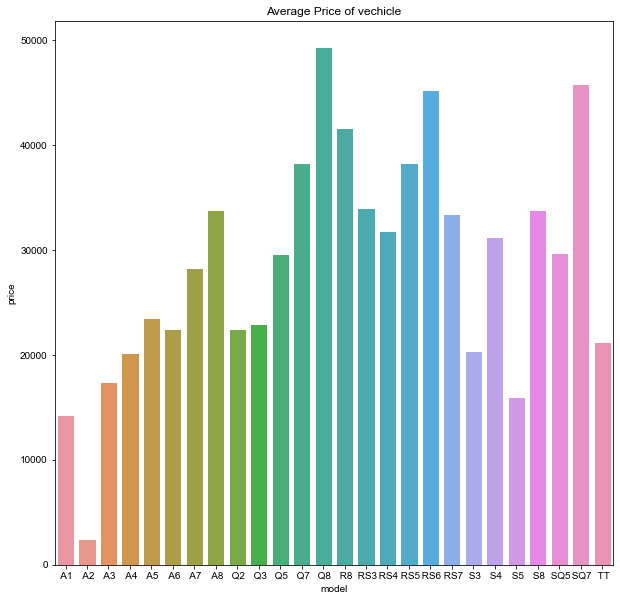

In [17]:
# Checking the price by model
plt.subplots(figsize=(10,10))
price_by_model = audi.groupby("model")['price'].mean().reset_index()
plt.title("Average Price of vechicle")
sns.set()
sns.barplot(x="model", y ="price", data = price_by_model)
plt.show()

## 3. Year

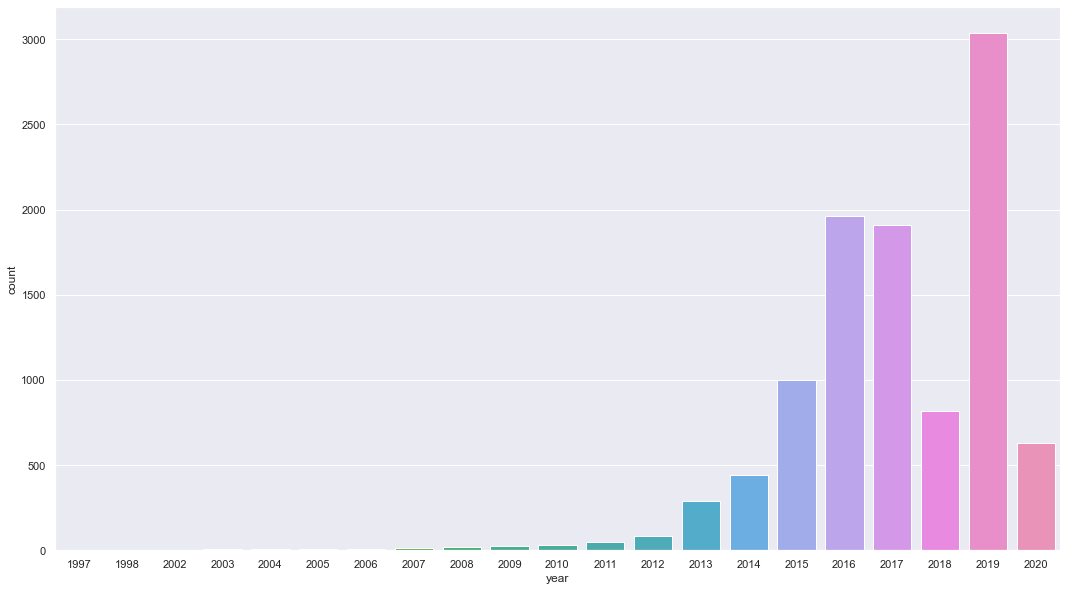

In [18]:
# Count plot on year
plt.subplots(figsize=(18,10))
ax = sns.countplot(audi.year, label = "Count")

In [19]:
print(audi.year.value_counts())

2019    3039
2016    1961
2017    1909
2015     997
2018     815
2020     632
2014     444
2013     290
2012      85
2011      47
2010      32
2009      23
2008      21
2007      16
2006       9
2005       7
2003       6
2004       5
2002       2
1997       1
1998       1
Name: year, dtype: int64


## 4. Transmission

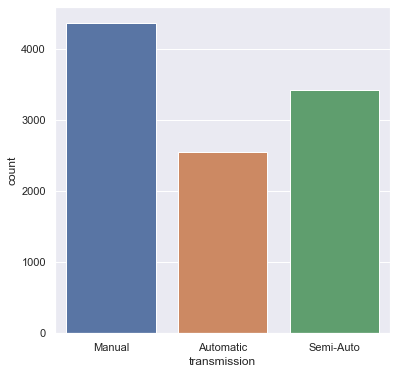

In [20]:
# Count plot on the transmission
plt.subplots(figsize=(6,6))
sns.countplot(audi.transmission, label = "Count")
plt.show()

In [21]:
print(audi.transmission.value_counts())

Manual       4369
Semi-Auto    3426
Automatic    2547
Name: transmission, dtype: int64


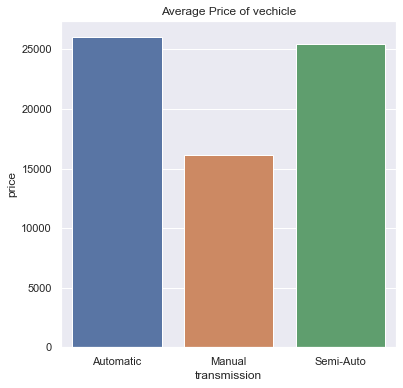

In [22]:
# Checking the price of car by transimission type
plt.subplots(figsize=(6,6))
price_by_transmission = audi.groupby("transmission")['price'].mean().reset_index()
plt.title("Average Price of vechicle")
sns.set()
sns.barplot(x="transmission", y ="price", data = price_by_transmission)
plt.show()

## 5. Mileage

In [23]:
print(audi['mileage'].describe())

count     10342.000000
mean      25350.406885
std       23641.747050
min           5.000000
25%        6000.000000
50%       19823.000000
75%       37124.500000
max      323000.000000
Name: mileage, dtype: float64


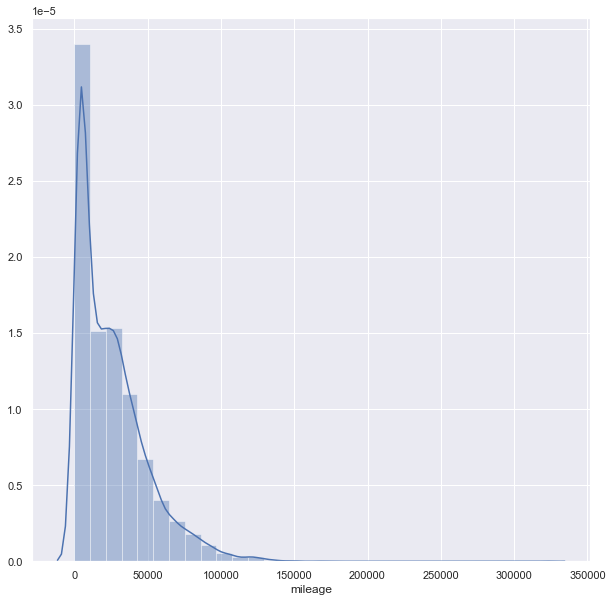

In [24]:
plt.figure(figsize = (10,10))
sns.distplot(audi['mileage'],bins=30)
plt.show()

## 6. Fuel Type

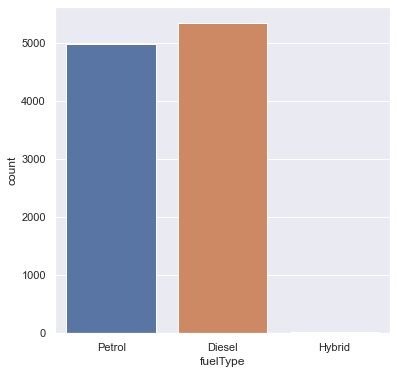

In [25]:
# Count plot on fuel type
plt.subplots(figsize=(6,6))
sns.countplot(audi.fuelType, label = "Count")
plt.show()

In [26]:
print(audi.fuelType.value_counts())

Diesel    5345
Petrol    4970
Hybrid      27
Name: fuelType, dtype: int64


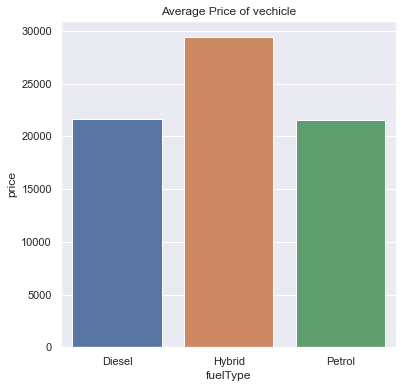

In [27]:
# Checking the price by fueltype
plt.subplots(figsize=(6,6))
price_by_fuel = audi.groupby("fuelType")['price'].mean().reset_index()
plt.title("Average Price of vechicle")
sns.set()
sns.barplot(x="fuelType", y ="price", data = price_by_fuel)
plt.show()

## 7. Tax

In [28]:
print(audi['tax'].describe())

count    10342.000000
mean       125.003868
std         66.970009
min          0.000000
25%        125.000000
50%        145.000000
75%        145.000000
max        580.000000
Name: tax, dtype: float64


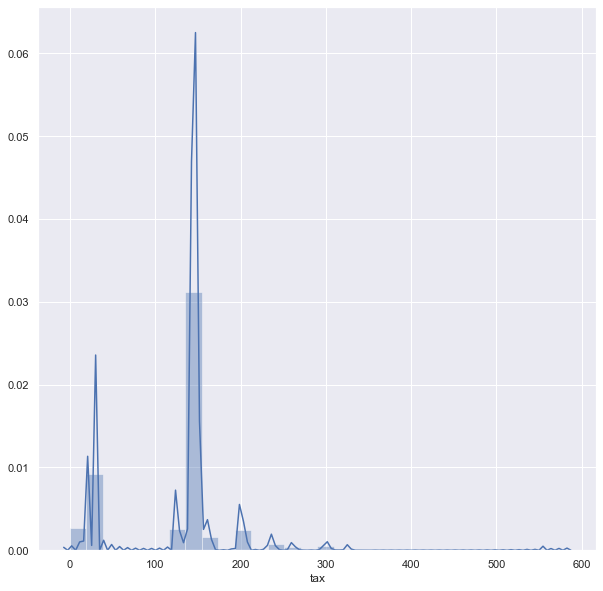

In [30]:
plt.figure(figsize = (10,10))
sns.distplot(audi['tax'],bins=30)
plt.show()

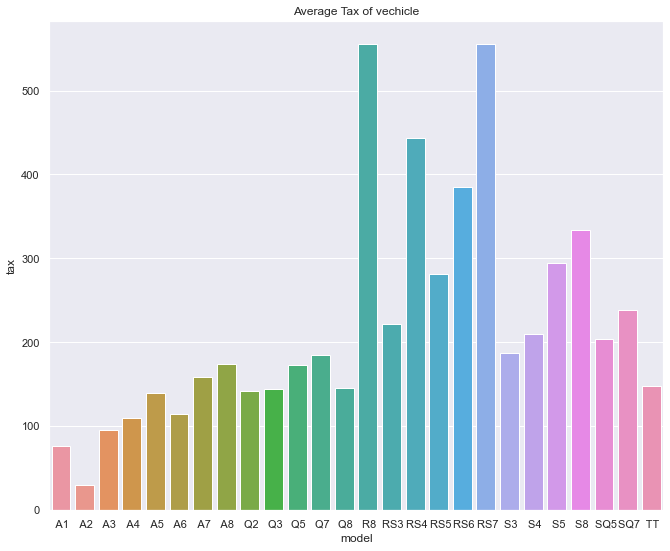

In [32]:
# Checking the avg tax by model
plt.subplots(figsize=(11,9))
tax_by_model = audi.groupby("model")['tax'].mean().reset_index()
plt.title("Average Tax of vechicle")
sns.barplot(x="model", y ="tax", data = tax_by_model)
plt.show()

## 8. MPG

In [234]:
print(audi['mpg'].describe())

count    10342.000000
mean        51.339354
std         12.689956
min         18.900000
25%         42.200000
50%         50.400000
75%         58.900000
max        188.300000
Name: mpg, dtype: float64


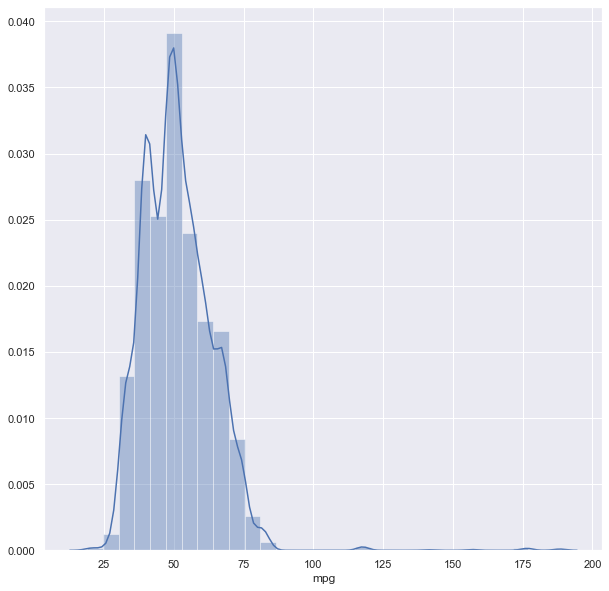

In [235]:
plt.figure(figsize = (10,10))
sns.distplot(audi['mpg'],bins=30)
plt.show()

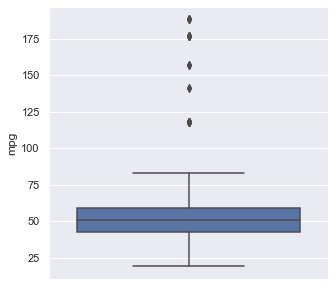

In [236]:
plt.figure(figsize = (5,5))
sns.boxplot(y = 'mpg', data = audi)
plt.show()

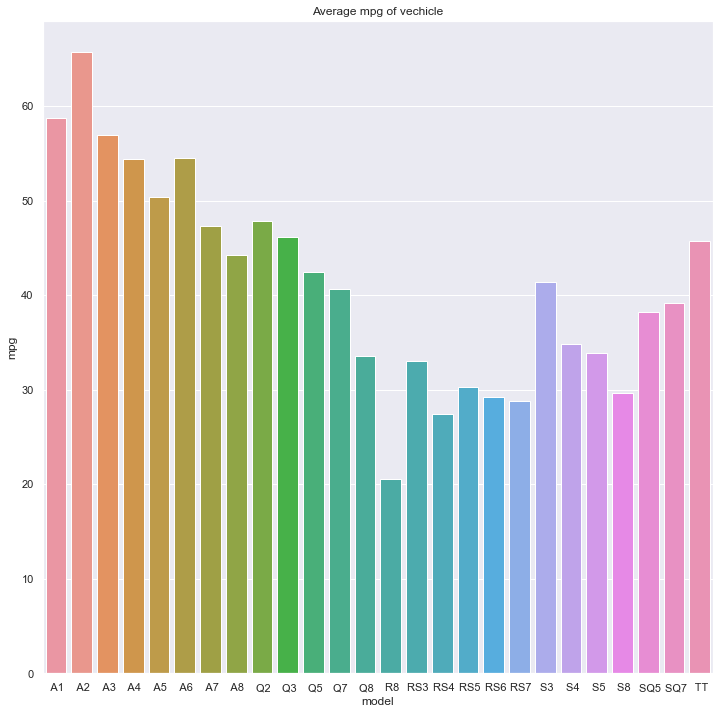

In [237]:
# Checking the avg mpg by model
plt.subplots(figsize=(12,12))
mpg_by_model = audi.groupby("model")['mpg'].mean().reset_index()
plt.title("Average mpg of vechicle")
sns.barplot(x="model", y ="mpg", data = mpg_by_model)
plt.show()

## 9. Engine Size

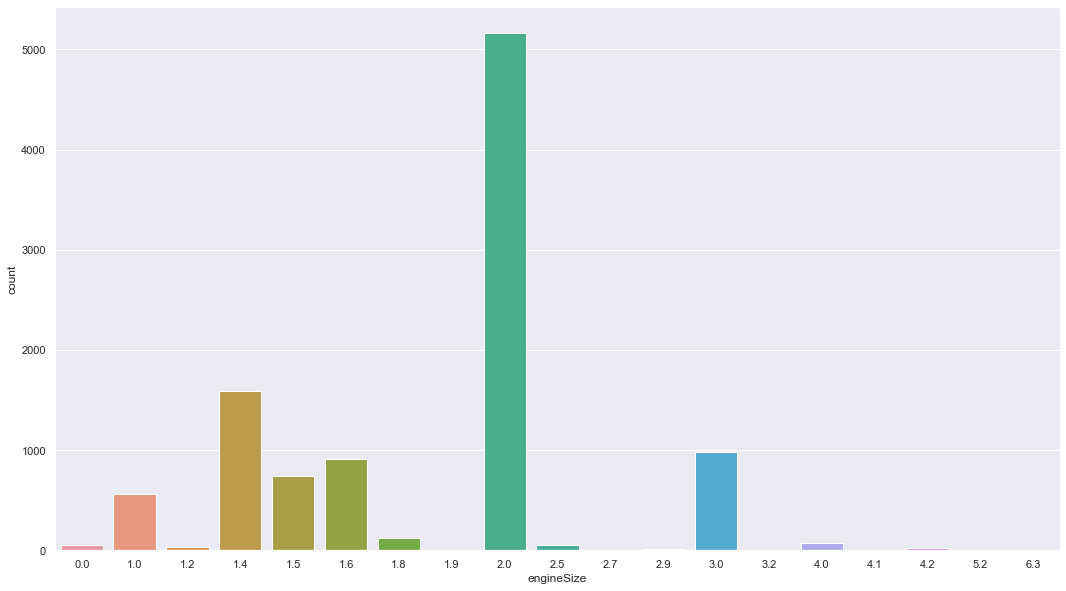

In [238]:
# Count plot on year
plt.subplots(figsize=(18,10))
ax = sns.countplot(audi.engineSize, label = "Count")

# Handling Categorical Features

In [239]:
# Converting categorical variables into numerical ones
le = LabelEncoder()

le.fit(audi.model)
audi.model = le.transform(audi.model)

le.fit(audi.transmission)
audi.transmission = le.transform(audi.transmission)

le.fit(audi.fuelType)
audi.fuelType = le.transform(audi.fuelType)

In [240]:
x = audi.drop('price', axis=1)
y = audi['price']

In [241]:
x.shape

(10342, 8)

In [242]:
x.head()

,model,year,transmission,mileage,fuelType,tax,mpg,engineSize
0,0,2017,1,15735,2,150,55.4,1.4
1,5,2016,0,36203,0,20,64.2,2.0
2,0,2016,1,29946,2,30,55.4,1.4
3,3,2017,0,25952,0,145,67.3,2.0
4,2,2019,1,1998,2,145,49.6,1.0


# Normalizing Data

In [243]:
MinMaxScaler = MinMaxScaler() 
data = MinMaxScaler.fit_transform(x)
data = pd.DataFrame(data, columns = x.columns)
data.head()

,model,year,transmission,mileage,fuelType,tax,mpg,engineSize
0,0.00,0.869565,0.5,0.048700,1.0,0.258621,0.215466,0.222222
1,0.20,0.826087,0.0,0.112070,0.0,0.034483,0.267414,0.317460
2,0.00,0.826087,0.5,0.092698,1.0,0.051724,0.215466,0.222222
3,0.12,0.869565,0.0,0.080333,0.0,0.250000,0.285714,0.317460
4,0.08,0.956522,0.5,0.006170,1.0,0.250000,0.181228,0.158730


# Model Building

In [244]:
x_train,x_test,y_train,y_test=train_test_split(data,y,test_size=0.3,random_state=0)

In [245]:
print("x_train shape is:",x_train.shape)

x_train shape is: (7239, 8)


In [246]:
x_train.head()

,model,year,transmission,mileage,fuelType,tax,mpg,engineSize
7416,0.08,0.869565,0.5,0.026610,1.0,0.250000,0.243211,0.222222
4761,0.16,0.956522,0.5,0.003378,1.0,0.250000,0.108028,0.317460
7798,0.44,0.782609,0.0,0.093782,0.0,0.344828,0.171192,0.476190
9696,0.44,0.956522,0.0,0.027304,0.0,0.258621,0.084416,0.476190
3194,0.32,0.869565,0.5,0.131857,0.0,0.051724,0.267414,0.253968


In [247]:
print("x_test shape is:",x_test.shape)

x_test shape is: (3103, 8)


In [248]:
print("y_train shape is:",y_train.shape)

y_train shape is: (7239,)


In [249]:
print("y_test shape is:",y_test.shape)

y_test shape is: (3103,)


# Linear Regression

In [250]:
lr = LinearRegression(fit_intercept=True, normalize=True,copy_X=True,n_jobs=-1)
lr.fit(x_train, y_train)
print("train R squared value =", lr.score(x_train, y_train))

train R squared value = 0.8049093351962304


In [251]:
print("test error =", lr.score(x_test, y_test))

test error = 0.8138808333185148


In [252]:
y_pred = lr.predict(x_test)
print('predicted price:', y_pred[:10])

predicted price: [30716.84484482  6677.5863327  29220.37282813 13438.94738114
 15530.25739886 29690.45681382 19294.2187913  13648.12680221
 15006.5174031  20796.66160912]


In [253]:
print('actual price:', y_test[:10])

actual price: 9986     30000
3099     10595
5242     26950
1409     13498
159      14300
4229     27850
7152     19995
8914     11499
124      11500
10347    20000
Name: price, dtype: int64


# Ridge Regression

In [254]:
# Using Ridge regression model
# RidgeCV will return best alpha and coefficients after performing 10 cross validations. 
# We will pass an array of random numbers for ridgeCV to select best alpha from them

alphas = np.random.uniform(low=0, high=10, size=(50,))
ridgecv = RidgeCV(alphas = alphas,cv=10,normalize = True)
ridgecv.fit(x_train, y_train)

RidgeCV(alphas=array([7.97309404, 1.46554853, 4.52806898, 2.6381397 , 8.1876278 ,
       0.15467286, 6.95699347, 9.35575173, 2.59881206, 7.3657985 ,
       5.05540364, 9.58471135, 6.50725436, 8.71798911, 8.69923531,
       1.89428728, 7.6046653 , 1.77782942, 6.99844705, 6.28128268,
       4.67478646, 1.73814935, 6.86747288, 9.57124819, 0.62601105,
       6.15813244, 5.01616036, 7.56993905, 1.81980416, 7.02611872,
       3.32103249, 5.53885288, 7.92166977, 2.38889993, 1.08364752,
       0.4397595 , 3.71585451, 5.51274908, 2.00514387, 7.71175602,
       3.04320603, 5.49380965, 2.1227436 , 7.4548487 , 8.22714046,
       0.21298205, 9.85052901, 2.36982654, 2.42341067, 0.10594243]),
        cv=10, normalize=True)

In [255]:
ridgecv.alpha_

0.10594243046213814

In [256]:
ridge_model = Ridge(alpha=ridgecv.alpha_)
ridge_model.fit(x_train, y_train)

Ridge(alpha=0.10594243046213814)

In [257]:
print("train R squared value =", ridge_model.score(x_train, y_train))

train R squared value = 0.8049073280128398


In [258]:
print("test R squared value =", ridge_model.score(x_test, y_test))

test R squared value = 0.8138554453370609


# Lasso Regression

In [259]:
# Lasso Regularization
# LassoCV will return best alpha and coefficients after performing 10 cross validations
lasscv = LassoCV(alphas = None,cv =10, max_iter = 100000, normalize = True)
lasscv.fit(x_train, y_train)

LassoCV(cv=10, max_iter=100000, normalize=True)

In [260]:
# best alpha parameter
alpha = lasscv.alpha_
alpha

0.07128304494092988

In [261]:
#now that we have best parameter, let's use Lasso regression and see how well our data has fitted before

lasso_reg = Lasso(alpha)
lasso_reg.fit(x_train, y_train)

Lasso(alpha=0.07128304494092988)

In [262]:
print("train R squared value =", lasso_reg.score(x_train, y_train))

train R squared value = 0.8049092644187371


In [263]:
print("test error =",lasso_reg.score(x_test, y_test))

test error = 0.8138902649197618


# Random Forest Regressor

In [264]:
Rfm = RandomForestRegressor(n_estimators=100,max_depth=11, random_state=33)
Rfm.fit(x_train, y_train)
print("train R squared value =", Rfm.score(x_train, y_train))


train R squared value = 0.9724746919195846


In [265]:
print("test error =", Rfm.score(x_test, y_test))

test error = 0.9458470279603969


In [266]:
y_pred = Rfm.predict(x_test)
print('predicted price:', y_pred[:10])

predicted price: [31267.35352272  9180.67554175 27335.33724489 13416.25625908
 14038.32304673 31644.03511517 18637.92290006 13519.21740022
 15563.22557732 20214.98450301]


In [267]:
print('actual price:', y_test[:10])

actual price: 9986     30000
3099     10595
5242     26950
1409     13498
159      14300
4229     27850
7152     19995
8914     11499
124      11500
10347    20000
Name: price, dtype: int64


# Support Vector Regression

In [268]:
SVRModel = SVR(C = 1.0 ,epsilon=0.1,kernel = 'poly') # it also can be : linear, poly, rbf, sigmoid, precomputed
SVRModel.fit(x_train, y_train)

SVR(kernel='poly')

In [269]:
print("train R squared value =", SVRModel.score(x_train, y_train))

train R squared value = 0.1764362529065926


In [270]:
print("test error =", SVRModel.score(x_test, y_test))

test error = 0.1834367941895284


In [271]:
y_pred = SVRModel.predict(x_test)
print('predicted price:', y_pred[:10])

predicted price: [18695.33545512 18156.66405827 19802.28461788 17640.2581555
 17708.81888494 20864.3459835  19408.80368621 17536.8900746
 17332.69432086 19788.11955887]


In [272]:
print('actual price:', y_test[:10])

actual price: 9986     30000
3099     10595
5242     26950
1409     13498
159      14300
4229     27850
7152     19995
8914     11499
124      11500
10347    20000
Name: price, dtype: int64


# Decision Tree Regressor

In [273]:
Dsc = DecisionTreeRegressor( max_depth=11,random_state=33)
Dsc.fit(x_train, y_train)
print("train R squared value =", Dsc.score(x_train, y_train))

train R squared value = 0.9685505685774505


In [274]:
print("test error =", Dsc.score(x_test, y_test))

test error = 0.925683737512855


In [275]:
y_pred = Dsc.predict(x_test)
print('predicted price:', y_pred[:10])

predicted price: [30872.5         8462.92307692 27634.28571429 13809.58333333
 13874.44444444 31220.         19796.85714286 13574.12087912
 18490.         19796.85714286]


In [276]:
print('actual price:', y_test[:10])

actual price: 9986     30000
3099     10595
5242     26950
1409     13498
159      14300
4229     27850
7152     19995
8914     11499
124      11500
10347    20000
Name: price, dtype: int64


# Conclusion

In [277]:
# Accuracy Comparison
dicti= { 'Linear Regression' : [80.49,81.38], 'Ridge Regression':[80.49,81.386],'Lasso Regression':[80.49,81.389],'Support Vector Regressor':[17.6,18.34],
       'Random Forest Regressor':[97.24,94.58], 'Decision Tree Regressor ':[96.85,92.56]}

In [278]:
df= pd.DataFrame.from_dict(data=dicti,orient='index',columns= ['Training R Squared','Testing R Squared'])
df

,Training R Squared,Testing R Squared
Linear Regression,80.49,81.380
Ridge Regression,80.49,81.386
Lasso Regression,80.49,81.389
Support Vector Regressor,17.60,18.340
Random Forest Regressor,97.24,94.580
Decision Tree Regressor,96.85,92.560


Random Forest well for both Training and Testing Dataset. It gives higher accuracy as compare to other algorithms.